# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chisquare

# Data Processing

In [ ]:
LA = pd.read_csv('Audience_LA', error_bad_lines = False)

b'Skipping line 390413: expected 10 fields, saw 11\n'
/Users/michellegu/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
new = LA.copy(deep = True)

In [ ]:
new

,Unnamed: 0,ZIP,GENDER,AGE,STATE_ABBREVIATION,DMA_NAME_ACXIOM,DEMO_HH_INCOME,ETHNICITY,HOMEOWNERSHIP_STATUS,EDUCATION
0,0,71202,M,67.0,LA,Monroe-El Dorado,"$30,000 to $49,999",African American,Homeowner,High School
1,1,70438,F,33.0,LA,New Orleans,"$100,000 to $149,999",White,Renter,College
2,2,70770,F,59.0,LA,Baton Rouge,"Less than $30,000",White,Homeowner,College
3,3,71108,F,63.0,LA,Shreveport,"$30,000 to $49,999",African American,Homeowner,College
4,4,70802,F,81.0,LA,Baton Rouge,"Less than $30,000",African American,Homeowner,not_reported
...,...,...,...,...,...,...,...,...,...,...
3904870,3710313,70124,M,51.0,LA,New Orleans,"$75,000 to $99,999",Hispanic,Homeowner,College
3904871,3710314,71112,M,33.0,LA,Shreveport,"Less than $30,000",White,Renter,not_reported
3904872,3710315,70764,M,73.0,LA,Baton Rouge,"$50,000 to $74,999",White,Homeowner,High School
3904873,3710316,70534,M,35.0,LA,"Lafayette, LA","Less than $30,000",White,Renter,not_reported


In [ ]:
#drop null values
new.dropna(axis = 0, inplace = True)

In [ ]:
#change type to be same for all entries (float), then change to int
new['AGE'] = new['AGE'].astype(float).astype(int)

#manipulate age into bins
new.loc[new['AGE'] <= 20, 'AGE'] = 0
new.loc[(new['AGE'] > 20) & (new['AGE'] <= 40), 'AGE'] = 1
new.loc[(new['AGE'] > 40) & (new['AGE'] <= 60), 'AGE'] = 2
new.loc[(new['AGE'] > 60) & (new['AGE'] <= 80), 'AGE'] = 3
new.loc[(new['AGE'] > 80) & (new['AGE'] <= 100), 'AGE'] = 4
new.loc[(new['AGE'] > 100) & (new['AGE'] <= 120), 'AGE'] = 5

In [ ]:
factor_dict = {
    'GENDER': {
        'M': 0,
        'F': 1
    },
    'HOMEOWNERSHIP_STATUS': {
        'Homeowner': 1,
        'Renter': 0
    },
    'DEMO_HH_INCOME': {
        'Less than $30,000': 0,
        '$30,000 to $49,999': 1, 
        '$50,000 to $74,999': 2,
        '$75,000 to $99,999': 3,
        '$100,000 to $149,999': 4,
        '$150,000 to $199,999': 5,
        '$200,000 to $249,999': 6,
        '$250,000 +': 7
    },
    'EDUCATION': {
        'not_reported': 0,
        'High School': 1,
        'Vocational_or_Technical': 2,
        'College': 3,
        'Graduate School': 4
    }
}
new.replace(factor_dict, inplace = True)

NameError: ignored

In [ ]:
#one hot encode function
def ohe_col(data, col):
    enc = OneHotEncoder()
    enc.fit(data[[col]])
    new = pd.DataFrame(enc.transform(data[[col]]).todense(),
                      columns = enc.get_feature_names(),
                      index = data.index)
    return data.join(new)

In [ ]:
new = ohe_col(new, 'ETHNICITY')
new = ohe_col(new, 'DMA_NAME_ACXIOM')

In [ ]:
new = new.set_index('Unnamed: 0')
new.drop(['ZIP', 'STATE_ABBREVIATION', 'DMA_NAME_ACXIOM', 'ETHNICITY'], axis = 1, inplace = True)

In [ ]:
new

# Correlation Matrix

In [ ]:
LACorr = new.corr()
LACorr

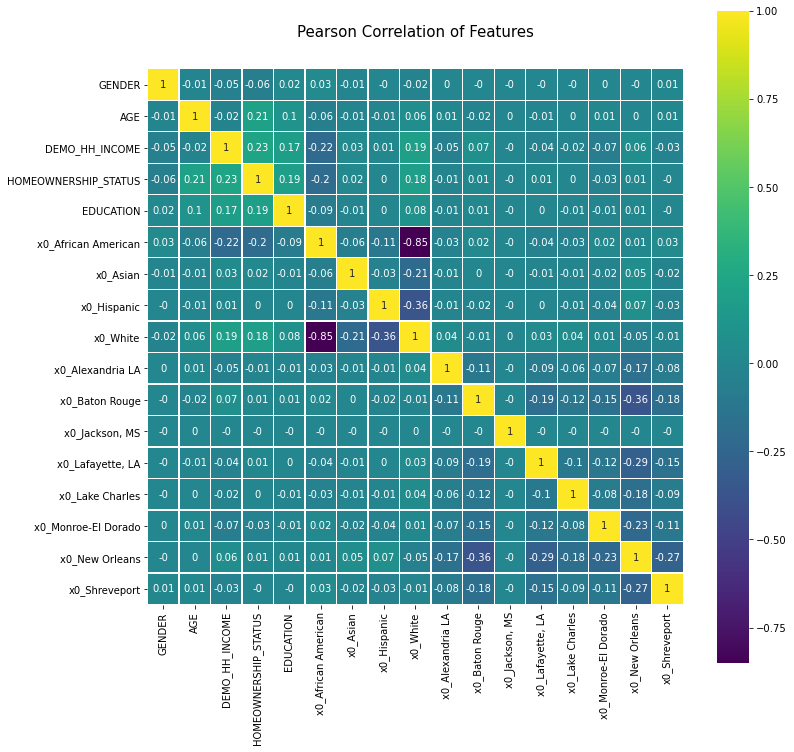

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(new.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

# Methods

In [ ]:
def ohe_col(data, col):
    enc = OneHotEncoder()
    enc.fit(data[[col]])
    new = pd.DataFrame(enc.transform(data[[col]]).todense(),
                      columns = enc.get_feature_names(),
                      index = data.index)
    return data.join(new)

In [ ]:
def process(df):
    
    df = df.dropna(axis = 0)
    df['AGE'] = df['AGE'].astype(float).astype(int)
    
    df.loc[df['AGE'] <= 20, 'AGE'] = 0
    df.loc[(df['AGE'] > 20) & (df['AGE'] <= 40), 'AGE'] = 1
    df.loc[(df['AGE'] > 40) & (df['AGE'] <= 60), 'AGE'] = 2
    df.loc[(df['AGE'] > 60) & (df['AGE'] <= 80), 'AGE'] = 3
    df.loc[(df['AGE'] > 80) & (df['AGE'] <= 100), 'AGE'] = 4
    df.loc[(df['AGE'] > 100) & (df['AGE'] <= 120), 'AGE'] = 5
    
    factor_dict = {
        'GENDER': {
            'M': 0,
            'F': 1
        },
        'HOMEOWNERSHIP_STATUS': {
            'Homeowner': 1,
            'Renter': 0
        },
        'DEMO_HH_INCOME': {
            'Less than $30,000': 0,
            '$30,000 to $49,999': 1, 
            '$50,000 to $74,999': 2,
            '$75,000 to $99,999': 3,
            '$100,000 to $149,999': 4,
            '$150,000 to $199,999': 5,
            '$200,000 to $249,999': 6,
            '$250,000 +': 7
        },
        'EDUCATION': {
            'not_reported': 0,
            'High School': 1,
            'Vocational_or_Technical': 2,
            'College': 3,
            'Graduate School': 4
        }
    }
    df = df.replace(factor_dict)
    
    df = ohe_col(df, 'ETHNICITY')
    df = ohe_col(df, 'DMA_NAME_ACXIOM')
    
    df = df.set_index('Unnamed: 0')
    df = df.drop(['ZIP', 'STATE_ABBREVIATION', 'DMA_NAME_ACXIOM', 'ETHNICITY'], axis = 1)
    
    return df

In [ ]:
#dataframe with all the manipulations/slices
def finalDF(df, featureDict):
    for column in featureDict.keys():
        new_df = pd.DataFrame()
        attributes = featureDict[column]
        for attribute in attributes:
            new_df = new_df.append(df[df[column] == attribute])
        df = new_df
    return df

In [ ]:
def corrMatrix(df):
    return df.corr()

In [ ]:
#step by step slicing (same as finalDF except only considering one column slice at a time)
def stepSlice(df, featureDict, column):
    new_df = pd.DataFrame()
    attributes = featureDict[column]
    for attribute in attributes:
        new_df = new_df.append(df[df[column] == attribute])
    df = new_df
    return df

In [ ]:
#encode selected features to match processed data frame
def encode(featureDict, encodeDict):
    encodedFeatures = {}
    for column in featureDict.keys():
        attributes = featureDict[column]
        if column in encodeDict.keys():
            encodedAttributes = list()
            for attribute in attributes:
                newAttribute = encodeDict[column][attribute]
                encodedAttributes.append(newAttribute)
            encodedFeatures[column] = encodedAttributes
        else:
            encodedFeatures[column] = attributes
    return encodedFeatures

In [ ]:
encodeDict = {
    'GENDER': {
        'M': 0,
        'F': 1
    },
    'HOMEOWNERSHIP_STATUS': {
        'Homeowner': 1,
        'Renter': 0
    },
    'DEMO_HH_INCOME': {
        'Less than $30,000': 0,
        '$30,000 to $49,999': 1, 
        '$50,000 to $74,999': 2,
        '$75,000 to $99,999': 3,
        '$100,000 to $149,999': 4,
        '$150,000 to $199,999': 5,
        '$200,000 to $249,999': 6,
        '$250,000 +': 7
    },
    'EDUCATION': {
        'not_reported': 0,
        'High School': 1,
        'Vocational_or_Technical': 2,
        'College': 3,
        'Graduate School': 4
    },
    'AGE': {
        'Less than 21': 0,
        '21 to 40': 1,
        '41 to 60': 2,
        '61 to 80': 3,
        '81 to 100': 4,
        '101 to 120': 5
    }
}

# Testing Section

In [ ]:
selectedFeatures = {
    'AGE': ['21 to 40', '41 to 60'], 
    'HOMEOWNERSHIP_STATUS': ['Homeowner'], 
    'EDUCATION': ['College', 'Graduate School'], 
    'DEMO_HH_INCOME': ['$75,000 to $99,999','$100,000 to $149,999', '$150,000 to $199,999']
}

In [ ]:
dataframeDict = {'original': None}
correlationDict = {'original': None}

test = LA.copy(deep = True)
original = process(test)
dataframeDict['original'] = original
correlationDict['original'] = corrMatrix(original)

encodedFeatures = encode(selectedFeatures, encodeDict)

#sliceOrder = list()
temp = original
for column in encodedFeatures.keys():
    slicedDF = stepSlice(new, encodedFeatures, column)
    dataframeDict[column] = slicedDF
    correlationDict[column] = corrMatrix(slicedDF)
    #sliceOrder.append(column)
    new = slicedDF

<ipython-input-15-630c587097d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = df['AGE'].astype(float).astype(int)
/Users/michellegu/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/michellegu/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [ ]:
dataframeDict['AGE']

,GENDER,AGE,DEMO_HH_INCOME,HOMEOWNERSHIP_STATUS,EDUCATION,x0_African American,x0_Asian,x0_Hispanic,x0_White,x0_Alexandria LA,x0_Baton Rouge,"x0_Jackson, MS","x0_Lafayette, LA",x0_Lake Charles,x0_Monroe-El Dorado,x0_New Orleans,x0_Shreveport
Unnamed: 0,,,,,,,,,,,,,,,,,
1,1,1,4,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,0,1,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47,1,1,2,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710298,0,2,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3710301,0,2,4,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3710305,0,2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Demo

## Instructions

1. manipulate original dataframe by simulating company selection of features
2. process data after selecting feature
3. create new correlation matrix
4. flag major changes

## Simulation

Toyota Sienna Advertisement
- Age:
- Household income:
- Education:
- Gender:
- Ethnicity:
- City/cities:
- Homeowner Status:

# Sources
- https://github.com/scetx/datax/blob/master/01-data-x-fundamentals/m160-titanic/nb-m160-titanic.ipynb

# Notes

- create a state dictionary